In [1]:
import pickle

emissions_emukit_model = pickle.load(open('../experimental_design/models/20_init_200_loop_model_emissions.pkl', "rb"))
emissions_emukit_model.optimize()
timeloss_emukit_model = pickle.load(open('../experimental_design/models/20_init_200_loop_model_timeLoss.pkl', "rb"))
timeloss_emukit_model.optimize()

Optimization restart 1/5, f = 539.7882823292514
Optimization restart 2/5, f = 565.9999244750919
Optimization restart 3/5, f = 539.7882823292991
Optimization restart 4/5, f = 539.7882823297659
Optimization restart 5/5, f = 539.7882823303206
Optimization restart 1/5, f = -334.3922349318955
Optimization restart 2/5, f = -334.3922349318748
Optimization restart 3/5, f = -334.39223493192253
Optimization restart 4/5, f = -334.3922349319299
Optimization restart 5/5, f = -302.15417479496875


In [2]:
from experimental_design.config import get_ofat_parameter_spaces
parameter_spaces = get_ofat_parameter_spaces()

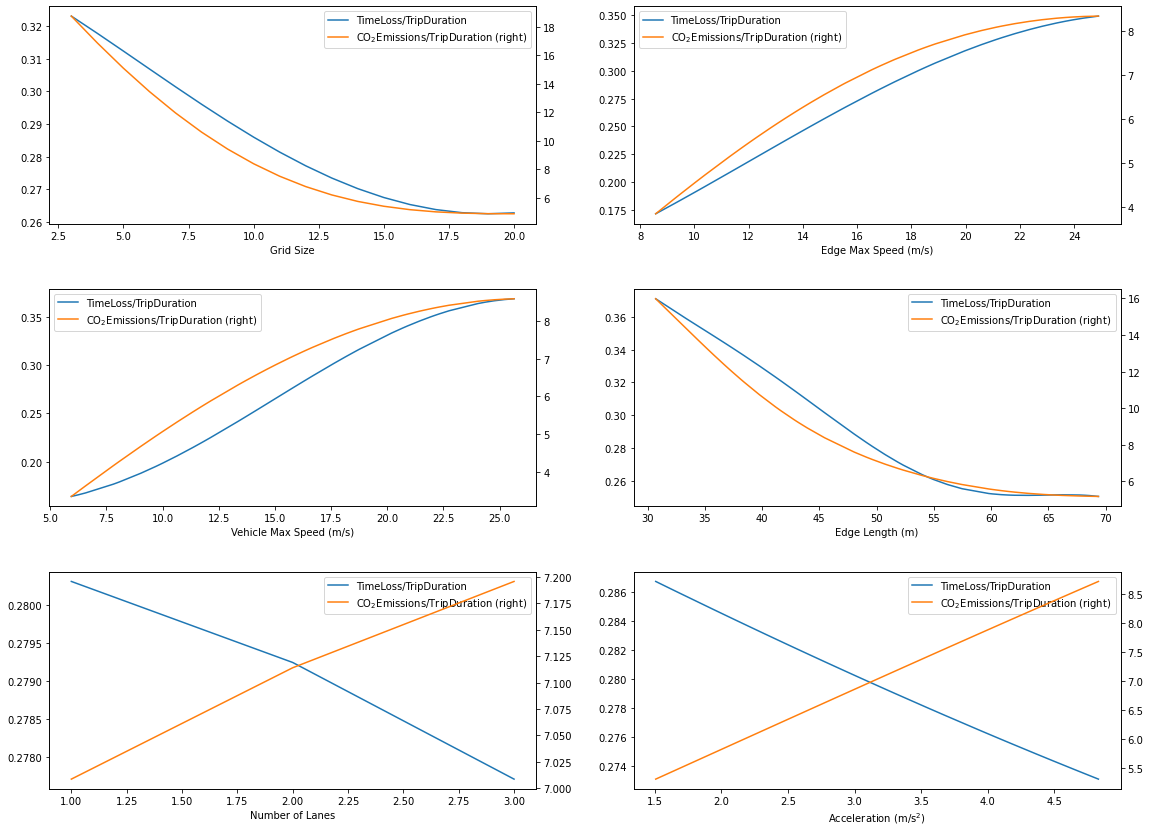

In [3]:
from emukit.core.initial_designs import RandomDesign
import pandas as pd
import matplotlib.pyplot as plt

num_data_points = 50
fig, axs = plt.subplots(len(parameter_spaces)//2, 2, figsize=[6.4*(len(parameter_spaces)//2), 4.8 * 3])
for idx, space_dict in enumerate(parameter_spaces):
    parameter_name = space_dict['name']
    parameter_space = space_dict['space']
    design = RandomDesign(parameter_space)  # initialize with random points
    test_X = design.get_samples(num_data_points)
    emissions_pred_Y, emissions_pred_Y_variance = emissions_emukit_model.predict(test_X)
    timeloss_pred_Y, timeloss_pred_Y_variance = timeloss_emukit_model.predict(test_X)

    e_x = test_X[:, idx]
    e_y = emissions_pred_Y[:, 0]
    e_p = e_x.argsort()
    e_x = e_x[e_p]
    e_y = e_y[e_p]

    t_x = test_X[:, idx]
    t_y = timeloss_pred_Y[:, 0]
    t_p = t_x.argsort()
    t_x = t_x[t_p]
    t_y = t_y[t_p]

    data = {
        't_x': t_x, 'TimeLoss/TripDuration': t_y,
        'e_x': e_x, 'CO$_2$Emissions/TripDuration': e_y
    }
    ax = axs[idx//2][idx%2]
    pd.DataFrame(data).plot.line(x='t_x', y='TimeLoss/TripDuration', ax=ax)
    pd.DataFrame(data).plot.line(secondary_y=True, x='e_x', y='CO$_2$Emissions/TripDuration', ax=ax)
    # ax.set_ylabel('CO$_2$Emissions/TripDuration')
    ax.set_xlabel(parameter_name)
plt.subplots_adjust(hspace=0.3)
fig.show()